In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://drive.google.com/uc?id=1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF"
df = pd.read_csv(url)

In [3]:
print(df.columns)

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [4]:
print(df.head())
print(df.describe())
print(df.isnull().sum()) 

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000
R&D Spend          0
Administration  

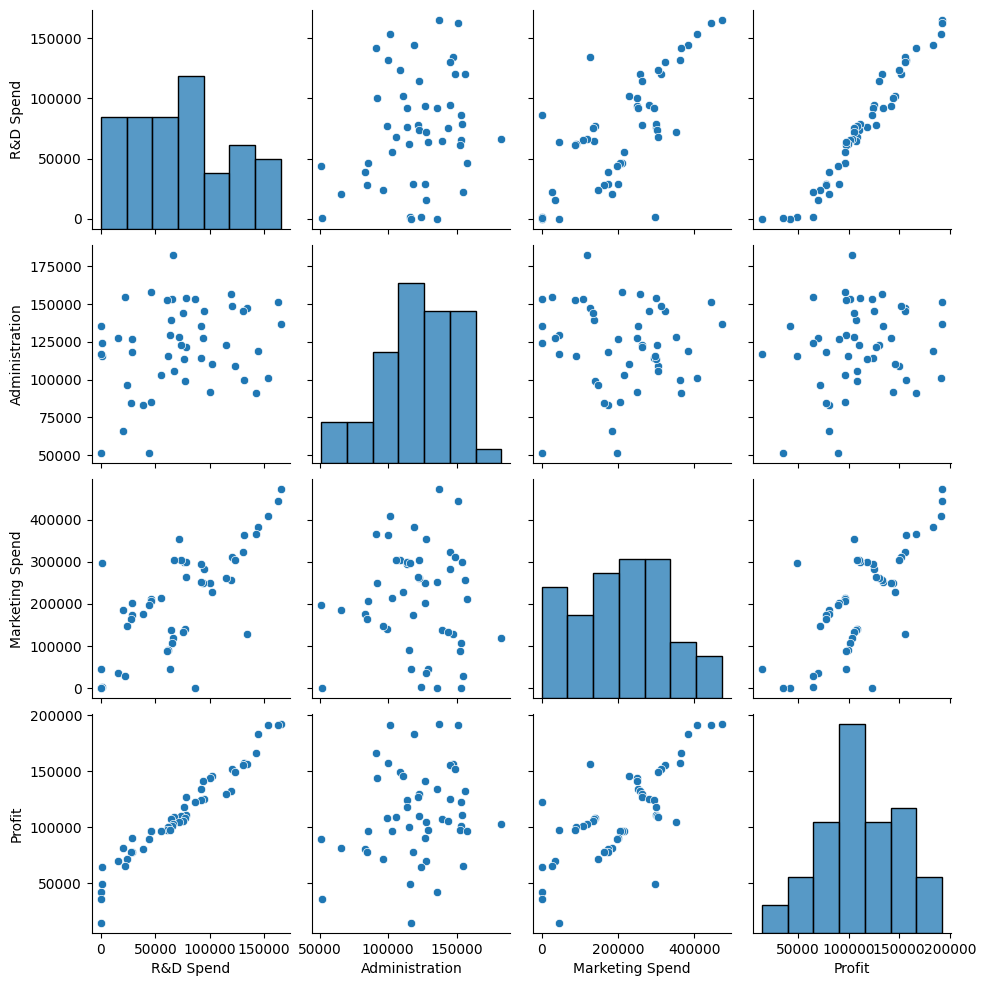

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# Selecting feature columns and target
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression:\nMAE: {mae:.2f}\nMSE: {mse:.2f}\nR² Score: {r2:.4f}")


Linear Regression:
MAE: 6979.15
MSE: 80926321.22
R² Score: 0.9001


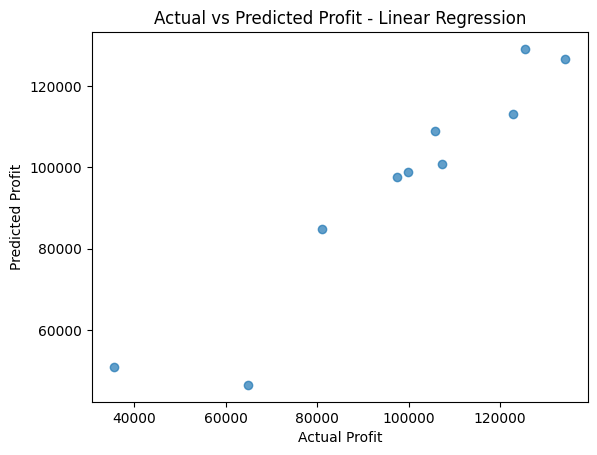

In [10]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit - Linear Regression")
plt.show()


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform features into polynomial terms
poly = PolynomialFeatures(degree=2)  # You can experiment with degree=3 for more complexity
X_poly = poly.fit_transform(X_train)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

# Predict with transformed test data
X_test_poly = poly.transform(X_test)
y_poly_pred = poly_model.predict(X_test_poly)

# Evaluate performance
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print(f"Polynomial Regression:\nMAE: {mae_poly:.2f}\nMSE: {mse_poly:.2f}\nR² Score: {r2_poly:.4f}")


Polynomial Regression:
MAE: 7506.06
MSE: 90304882.27
R² Score: 0.8885


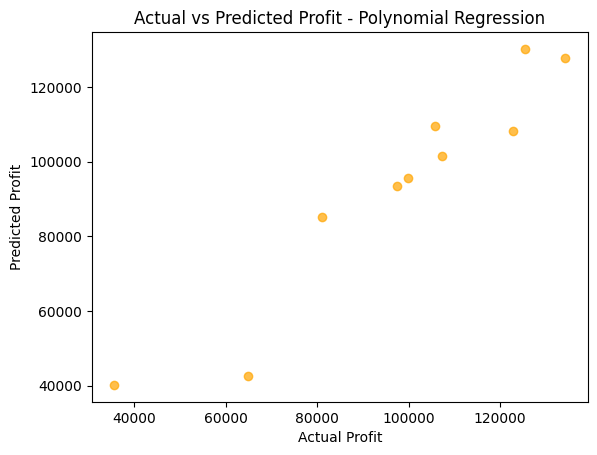

In [12]:
plt.scatter(y_test, y_poly_pred, alpha=0.7, color='orange')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit - Polynomial Regression")
plt.show()


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_dt_pred = dt_model.predict(X_test)

# Evaluate model performance
mae_dt = mean_absolute_error(y_test, y_dt_pred)
mse_dt = mean_squared_error(y_test, y_dt_pred)
r2_dt = r2_score(y_test, y_dt_pred)

print(f"Decision Tree Regression:\nMAE: {mae_dt:.2f}\nMSE: {mse_dt:.2f}\nR² Score: {r2_dt:.4f}")


Decision Tree Regression:
MAE: 13755.66
MSE: 400026479.25
R² Score: 0.5060


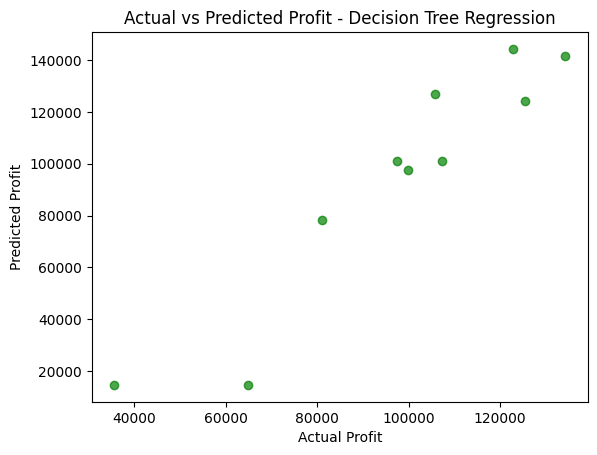

In [14]:
plt.scatter(y_test, y_dt_pred, alpha=0.7, color='green')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit - Decision Tree Regression")
plt.show()


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate model performance
mae_rf = mean_absolute_error(y_test, y_rf_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest Regression:\nMAE: {mae_rf:.2f}\nMSE: {mse_rf:.2f}\nR² Score: {r2_rf:.4f}")


Random Forest Regression:
MAE: 6437.50
MSE: 72625008.62
R² Score: 0.9103


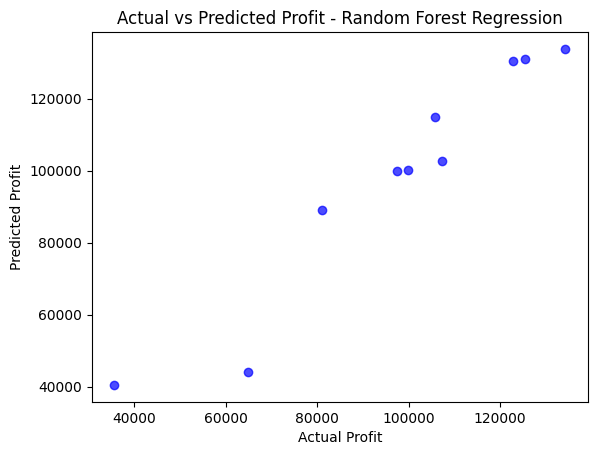

In [16]:
plt.scatter(y_test, y_rf_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit - Random Forest Regression")
plt.show()


In [17]:

# Step 3: Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [18]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
rf_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

y_rf_best_pred = rf_best.predict(X_test)

print(f"Tuned Random Forest Regression:\nMAE: {mean_absolute_error(y_test, y_rf_best_pred):.2f}\nMSE: {mean_squared_error(y_test, y_rf_best_pred):.2f}\nR² Score: {r2_score(y_test, y_rf_best_pred):.4f}")

Tuned Random Forest Regression:
MAE: 6476.53
MSE: 78951620.48
R² Score: 0.9025


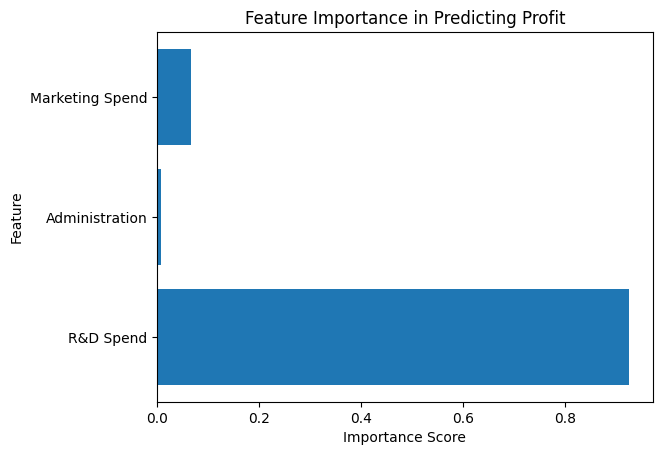

In [20]:
# Step 4: Feature Importance Analysis
importances = rf_best.feature_importances_
feature_names = X.columns

plt.barh(feature_names, importances)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting Profit")
plt.show()

In [21]:
import joblib

# Save trained model
joblib.dump(rf_best, "profit_prediction_model.pkl")

# Save the scaler (important for proper prediction)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!
